In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR 
from sklearn.metrics import accuracy_score
import warnings 
import pickle
import pymongo
import configparser
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
df = pd.read_csv("./data/adult.csv", na_values=['nan','?'])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
cols = {
    "education.num":"education_num",
    "marital.status":"marital_status",
    "capital.gain":"capital_gain",
    "capital.loss":"capital_loss",
    "hours.per.week":"hours_per_week",
    "native.country":"native_country"

}

df.rename(columns=cols, inplace=True)

In [4]:
print("Here is a detailed description of the dataset: \n")
df.info()
print("="*50)



Here is a detailed description of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
print("Here are Feature Details:\n")
print(df.dtypes)
print("="*50)

Here are Feature Details:

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


***Features with Missing Values - workclass, occupation, native_country which are categorical features.***


In [6]:
print("""Missing Values Information """)

# features = []
for i in df.columns:
    if df[i].isnull().sum() != 0:
        # features.append(i)
        print(f"{i}: {round(((df[i].isnull().sum()/len(df))*100),2)}%\n")
        
        df[i] = df[i].fillna(df[i].mode()[0])

        

Missing Values Information 
workclass: 5.64%

occupation: 5.66%

native_country: 1.79%



***Missing Values of Categorical Features are imputed with mode() function***  

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='count'>

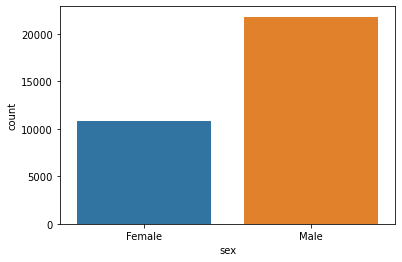

In [20]:
sns.countplot(data=df, x='sex')

In [34]:
df.education.value_counts().head(5)

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
Name: education, dtype: int64

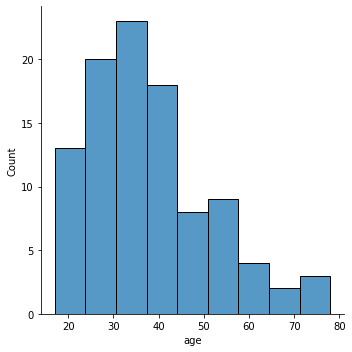

In [45]:
sns.displot(x='age', data=df.sample(100))

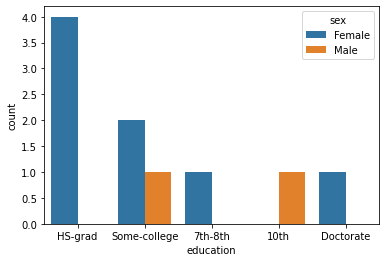

In [40]:
sns.countplot(x='education',hue='sex', data=df.head(10))
plt.show()

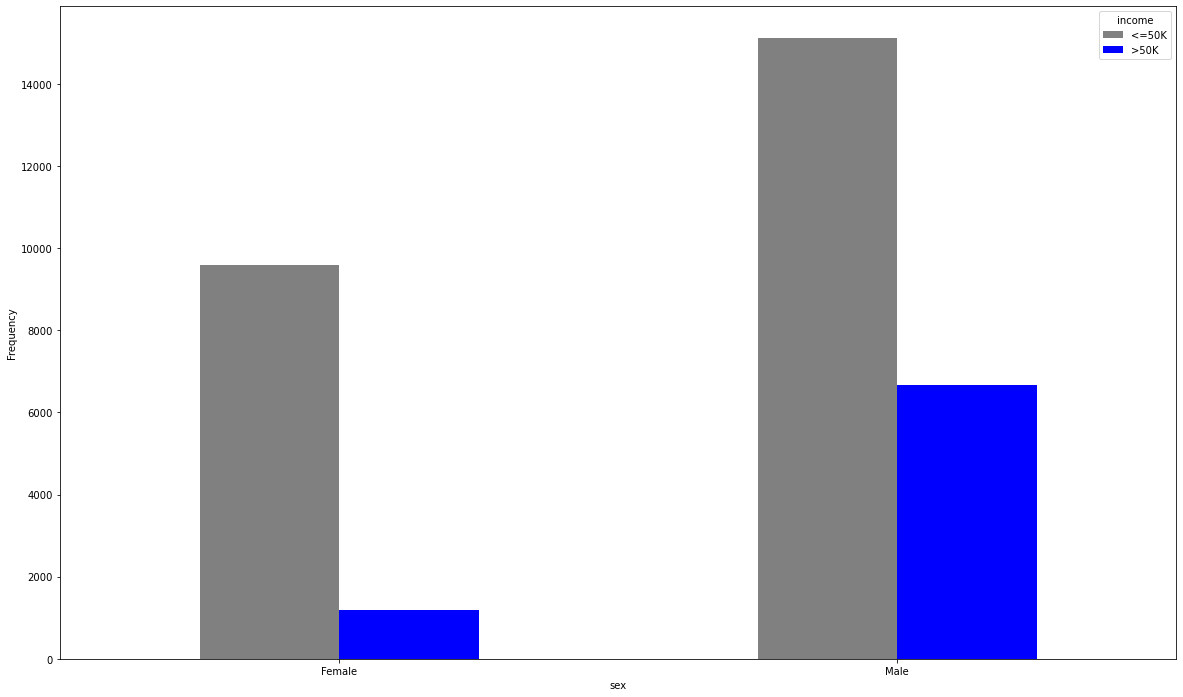

In [28]:
pd.crosstab(df['sex'],df['income']).plot(kind='bar',figsize=(20,12), color=["Grey","Blue"])
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()